# **Importing Libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [131]:
import matplotlib
cv2.__version__

'4.1.2'

# **Loading Dataset - MNIST**

In [82]:
mnist = tf.keras.datasets.mnist

In [83]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [84]:
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_test,axis = 1)

In [85]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [86]:
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)

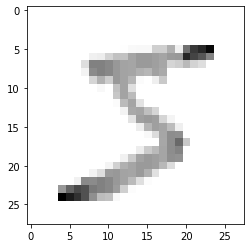

In [87]:
plt.imshow(X_train[0],cmap = plt.cm.binary)

In [88]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [89]:
y_train.shape
y_test.shape

(10000, 1)

In [90]:
y = []
for label in y_train:
    k = np.zeros(10)
    k[label] = 1
    y.append(k)    

In [91]:
y_t = []
for label in y_test:
    k = np.zeros(10)
    k[label] = 1
    y_t.append(k)    

In [92]:
y = np.array(y)
y_t = np.array(y_t)

In [93]:
y.shape

(60000, 10)

# **Building Model - CNN**

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size = 3, activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = 2,strides= 2),
    tf.keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides= 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])  

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

# **Training**

In [71]:
model.fit(X_train,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2501 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0220 - accuracy: 0.9936
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9941
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0074 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.005

# **Summary about the model**

In [97]:
X_train[0].shape


(28, 28, 1)

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              3277824   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [73]:
loss,accuracy = model.evaluate(X_test,y_t)

313/313 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.9907


# **Predicting on samples**

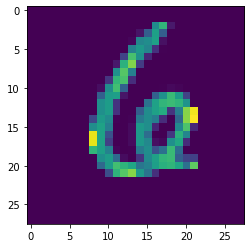

In [121]:
plt.imshow(X_test[123])

In [122]:
arr = np.asarray(X_test[123])

In [123]:
arr.shape

(28, 28, 1)

In [124]:
arr = arr[:,:,0]

In [125]:
arr.shape

(28, 28)

In [126]:
arr = arr.reshape(1,28,28,1)

In [127]:
arr = (arr-arr.min())/(arr.max() - arr.min())

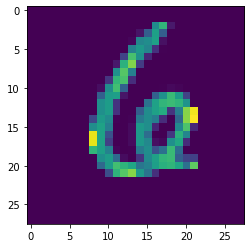

In [128]:
plt.imshow(arr[0,:,:,0])

In [129]:
pred = model.predict(arr)

In [130]:
np.argmax(pred)

6

Here you can see that our model gave output as *6* and the above image also depicts as 6.

# **Important numbers**

In [116]:
print("Accuracy : {}".format(accuracy))
print("Loss : {}".format(loss))

Accuracy : 0.9907000064849854
Loss : 0.04639967530965805


# **Saving the model**

In [118]:
!mkdir -p saved_model
model.save('final_model/digit_model')

INFO:tensorflow:Assets written to: final_model/digit_model/assets


In [119]:
!zip -r /content/file.zip /content/final_model

  adding: content/final_model/ (stored 0%)
  adding: content/final_model/digit_model/ (stored 0%)
  adding: content/final_model/digit_model/assets/ (stored 0%)
  adding: content/final_model/digit_model/variables/ (stored 0%)
  adding: content/final_model/digit_model/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: content/final_model/digit_model/variables/variables.index (deflated 64%)
  adding: content/final_model/digit_model/saved_model.pb (deflated 89%)


In [120]:
from google.colab import files
files.download("/content/model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>